<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21606A" size=24px>
                    <b> Divorce Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
A recent study on divorce in Turkey shows that about 1 percent of married same-sex couples get divorced each year, while about 2 percent of married straight couples divorce. Many couples go thorugh marraige counseling sessions during the cooling period of divorce granted by the law. Here the couples are asked series of questions by the counselors and the couples are intended to answer those questions. 
So through this we can predict the percentage of Divorce and the most common factors involed in decision of divorce by analyzing these answers given by the coulpes via Python programming and ML algorithms.


## Importing required libraries and functions

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 444 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=9b3e21be3a37fbf654f37a90656e962dafde494bef9b85f03a904faec08e841e
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_regression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import randint as sp_randint, pearsonr
from ctypes import LibraryLoader
from imblearn.over_sampling import SMOTE
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

## Data Definition

Context:
Answers to certain questions can provide key information regarding if a couple is likely to get divorced in the future. Each feature in the dataset represents a question asked in the survey to which an answer was given.


Content
Attribute Information:
Questions are ranked on a scale of 0-4 with 0 being the lowest and 4 being the highest. The last category states if the couple has divorced.



## Read Data

In [ ]:
# Connecting to google drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df = pd.read_csv('/content/divorce.csv')
df.head(10)

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,...,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,...,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,...,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,...,2,0,2,2,2,2,4,3,3,1


In [ ]:
# spliting the data into features and variables

x = df.drop('Divorce_Y_N',axis=1)
y = df['Divorce_Y_N']

In [ ]:
df_Y = df[df['Divorce_Y_N'] == 1] #Divorced data
df_N = df[df['Divorce_Y_N'] == 0] #Undivorced data

## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

In [ ]:
df.shape

(170, 55)

In [ ]:
df_Y.describe()  #5 point summary divorced data

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,3.190476,2.869048,2.916667,2.72619,3.011905,1.130952,0.988095,2.809524,2.892857,2.773810,...,3.166667,3.321429,3.452381,3.511905,3.500000,3.357143,3.488095,3.321429,3.369048,1.0
std,0.752125,0.915460,0.747821,0.92295,0.975533,0.902203,1.069783,1.011693,0.878359,0.882919,...,1.095812,1.121109,0.718176,0.783782,0.814034,0.845154,0.871144,0.920460,1.095223,0.0
min,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0
25%,3.000000,2.000000,3.000000,2.00000,3.000000,0.000000,0.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0
50%,3.000000,3.000000,3.000000,3.00000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
75%,4.000000,4.000000,3.000000,3.00000,4.000000,2.000000,1.000000,3.250000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
max,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0


In [ ]:
df_Y.describe()  #5 point summary divorced data

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,3.190476,2.869048,2.916667,2.72619,3.011905,1.130952,0.988095,2.809524,2.892857,2.773810,...,3.166667,3.321429,3.452381,3.511905,3.500000,3.357143,3.488095,3.321429,3.369048,1.0
std,0.752125,0.915460,0.747821,0.92295,0.975533,0.902203,1.069783,1.011693,0.878359,0.882919,...,1.095812,1.121109,0.718176,0.783782,0.814034,0.845154,0.871144,0.920460,1.095223,0.0
min,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0
25%,3.000000,2.000000,3.000000,2.00000,3.000000,0.000000,0.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0
50%,3.000000,3.000000,3.000000,3.00000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
75%,4.000000,4.000000,3.000000,3.00000,4.000000,2.000000,1.000000,3.250000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0
max,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0


In [ ]:
df.isnull().sum() #checking for missing values

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [ ]:
# checking for corellation

corr = df.corr()
corr

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
Sorry_end,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Ignore_diff,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
begin_correct,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Contact,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Special_time,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
No_home_time,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
2_strangers,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
enjoy_holiday,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
enjoy_travel,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
common_goals,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


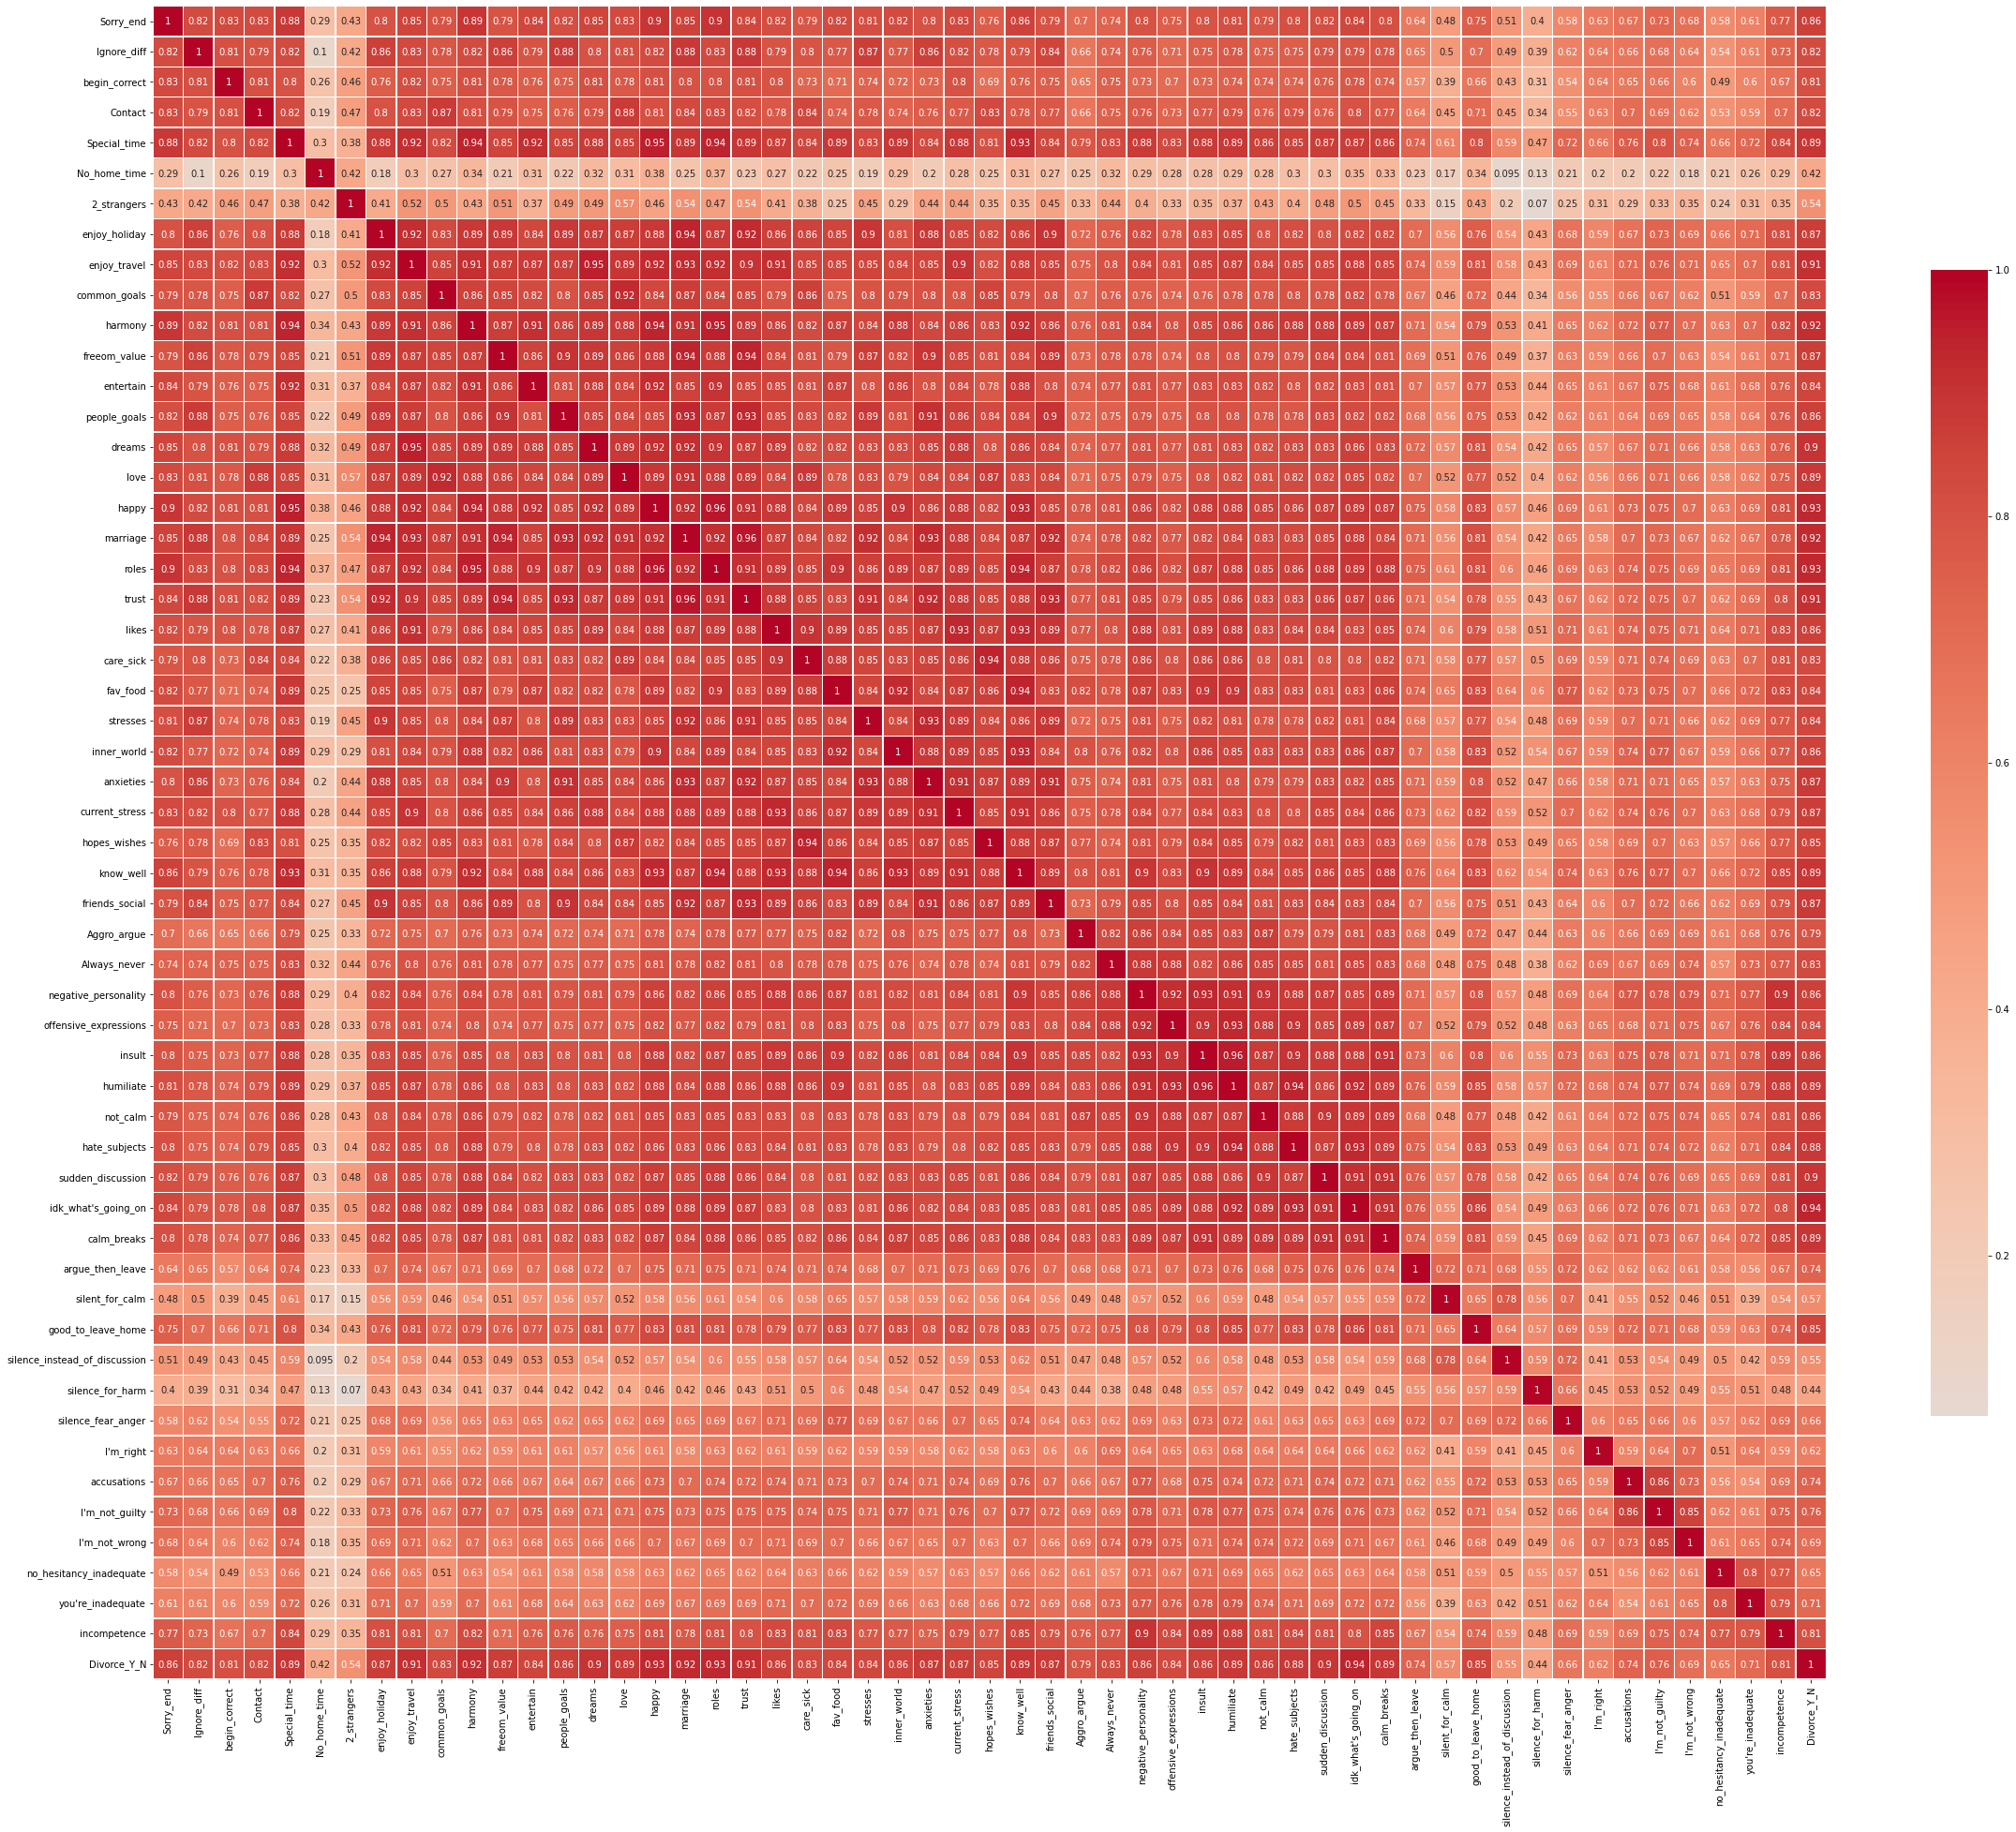

In [ ]:
plt.figure(figsize=(40,45))
sns.heatmap(df.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

The p-value < 0.05, correlation is present among the variables with 95% confidence interval

Since most of the features are correlated with each other, its better to factor analysis

In [ ]:
chi2,p = calculate_bartlett_sphericity(x)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  17654.270924632456
p value :  0.0


### Finding important features to predict divorce using feature importance in Random Forest Model

In [ ]:
RFC = RandomForestClassifier(random_state=42)
RFCmodel=RFC.fit(x, y)

Feature: 0, Score: 0.00079
Feature: 1, Score: 0.00142
Feature: 2, Score: 0.00342
Feature: 3, Score: 0.00091
Feature: 4, Score: 0.01766
Feature: 5, Score: 0.00078
Feature: 6, Score: 0.00046
Feature: 7, Score: 0.02581
Feature: 8, Score: 0.06554
Feature: 9, Score: 0.00032
Feature: 10, Score: 0.07981
Feature: 11, Score: 0.05529
Feature: 12, Score: 0.00118
Feature: 13, Score: 0.02122
Feature: 14, Score: 0.01911
Feature: 15, Score: 0.08318
Feature: 16, Score: 0.02267
Feature: 17, Score: 0.07777
Feature: 18, Score: 0.05927
Feature: 19, Score: 0.07960
Feature: 20, Score: 0.01784
Feature: 21, Score: 0.00045
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00915
Feature: 24, Score: 0.02673
Feature: 25, Score: 0.05862
Feature: 26, Score: 0.01769
Feature: 27, Score: 0.01028
Feature: 28, Score: 0.01031
Feature: 29, Score: 0.04507
Feature: 30, Score: 0.00087
Feature: 31, Score: 0.00033
Feature: 32, Score: 0.00282
Feature: 33, Score: 0.00039
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.01078
Fe

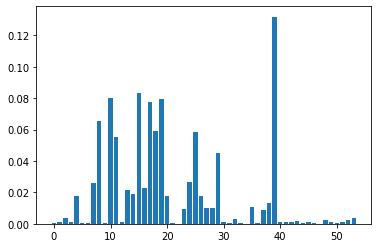

In [ ]:
importance = RFCmodel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
df1 = df.iloc[:,[8,10,15,16,17,18,19,25,39,54]]

### Analysis of the important variables

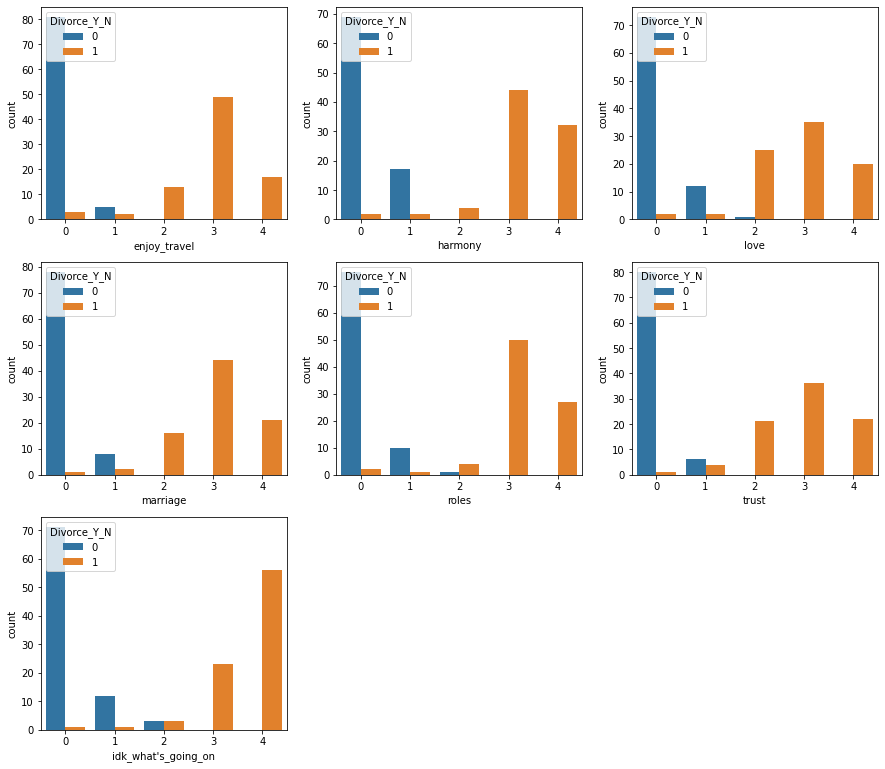

In [ ]:
# plotting responses against important features to observe difference of responses between two categories
i=1
plt.figure(figsize=(15, 18))
for f in df1.drop("Divorce_Y_N",axis=1).columns:
    plt.subplot(4, 3, i)
    sns.countplot(data=df1, x=f,hue='Divorce_Y_N')
    i +=1

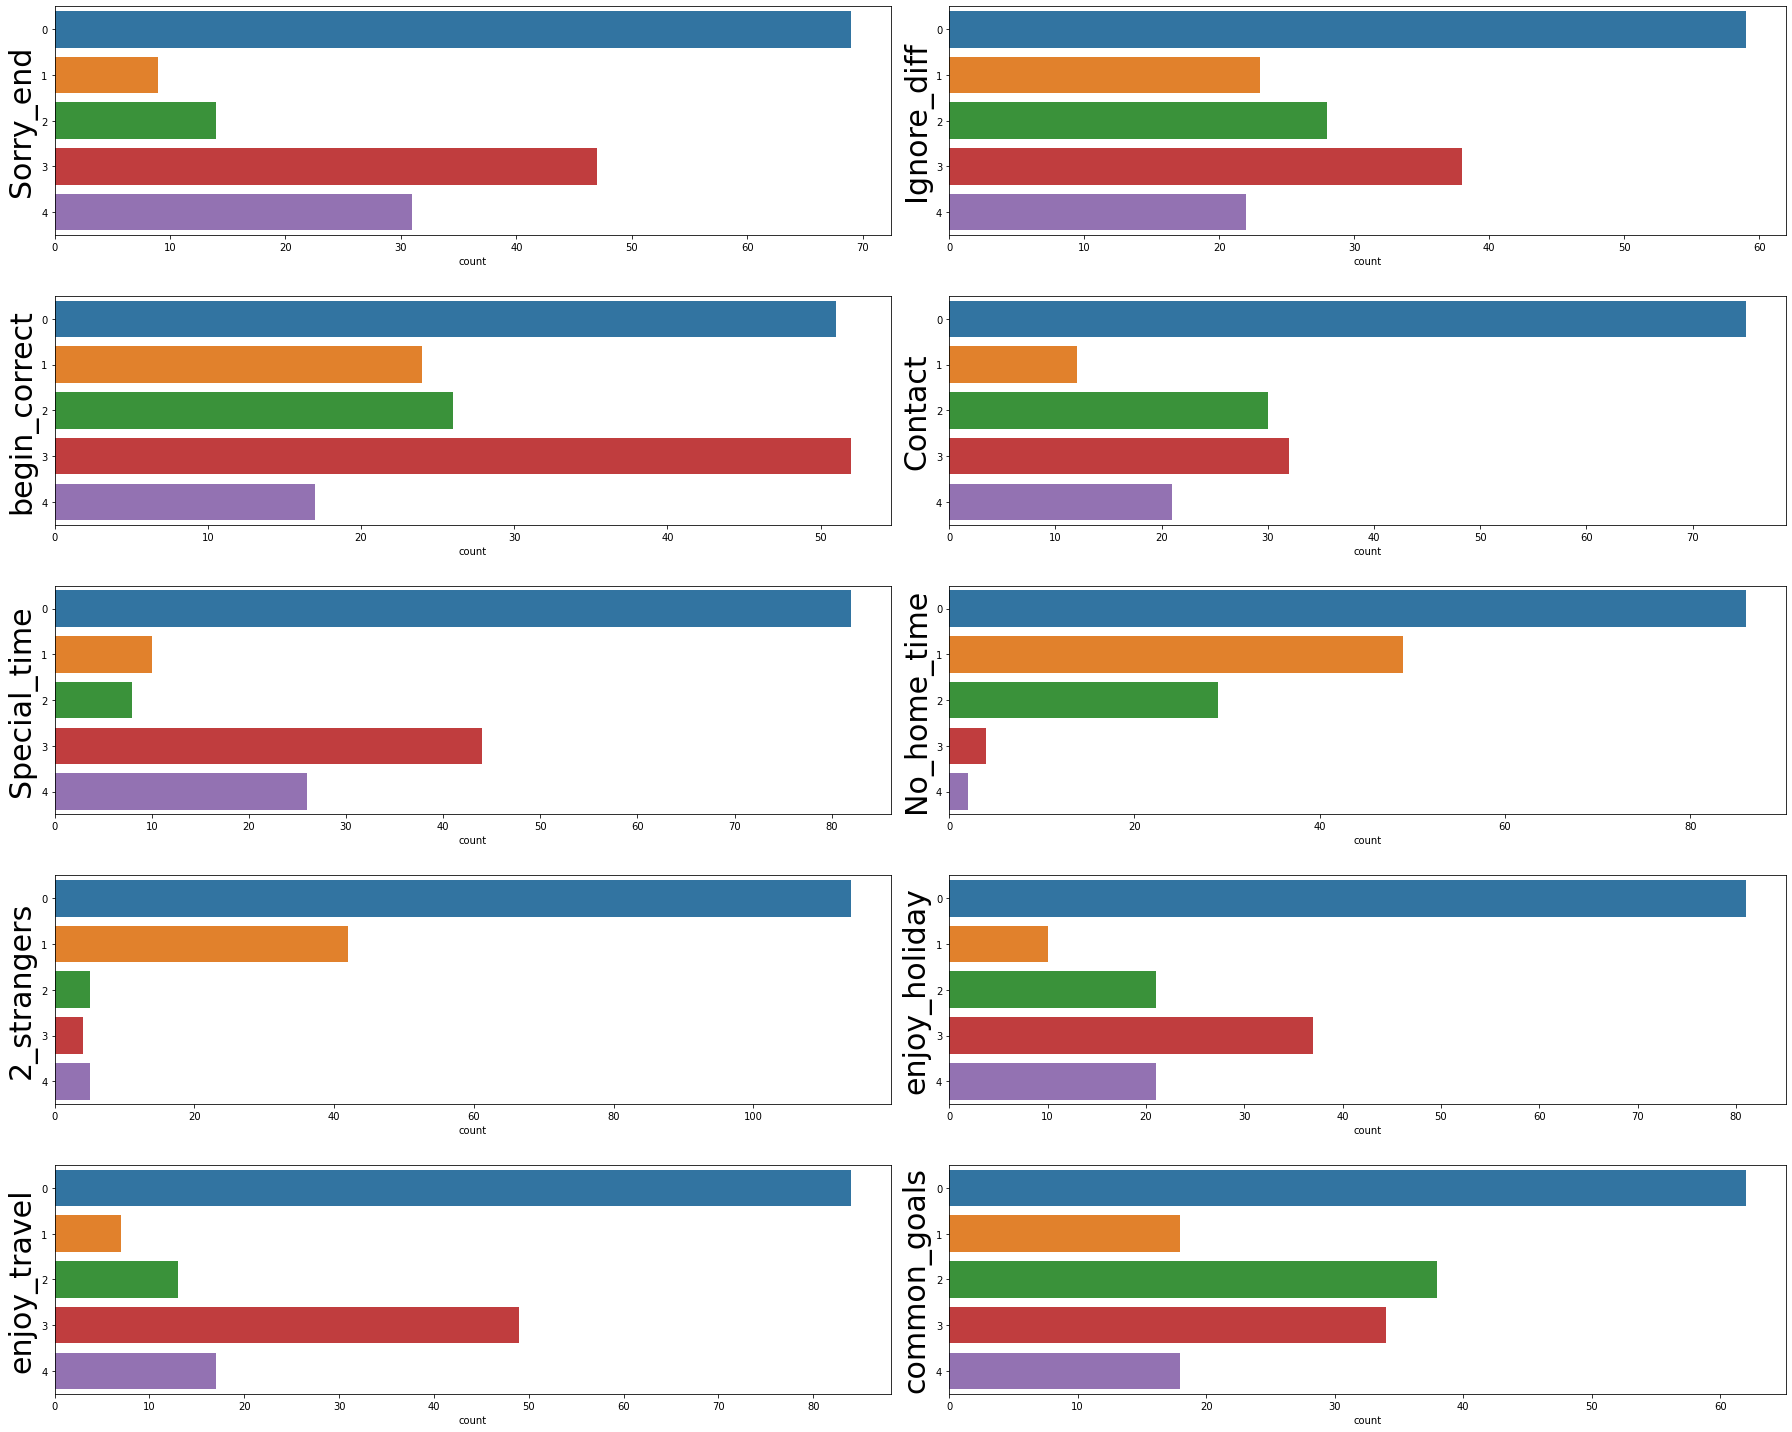

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(25, 20))
for variable, subplot in zip(df, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)  
plt.tight_layout()   
plt.show()

### Analysis of the text file

In [ ]:
with open('/content/Divorce_README.txt') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

In [ ]:
que = [x.split('\t')[1] for x in lines[2:]]
que[:5]

['If one of us apologizes when our discussion deteriorates, the discussion ends.',
 'I know we can ignore our differences, even if things get hard sometimes.',
 'When we need it, we can take our discussions with my spouse from the beginning and correct it.',
 'When I discuss with my spouse, to contact him will eventually work.',
 'The time I spent with my wife is special for us.']

In [ ]:
# Descriptive statistics
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))
    
que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'yellow',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
"If one of us apologizes when our discussion deteriorates, the discussion ends.",40.6%,5.3%,8.2%,27.6%,18.2%
"I know we can ignore our differences, even if things get hard sometimes.",34.7%,13.5%,16.5%,22.4%,12.9%
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",30.0%,14.1%,15.3%,30.6%,10.0%
"When I discuss with my spouse, to contact him will eventually work.",44.1%,7.1%,17.6%,18.8%,12.3%
The time I spent with my wife is special for us.,48.2%,5.9%,4.7%,25.9%,15.3%
We don't have time at home as partners.,50.6%,28.8%,17.1%,2.4%,1.2%
We are like two strangers who share the same environment at home rather than family.,67.1%,24.7%,2.9%,2.4%,2.9%
I enjoy our holidays with my wife.,47.6%,5.9%,12.3%,21.8%,12.3%
I enjoy traveling with my wife.,49.4%,4.1%,7.7%,28.8%,10.0%
Most of our goals are common to my spouse.,36.5%,10.6%,22.4%,20.0%,10.6%


### Analysis of target variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


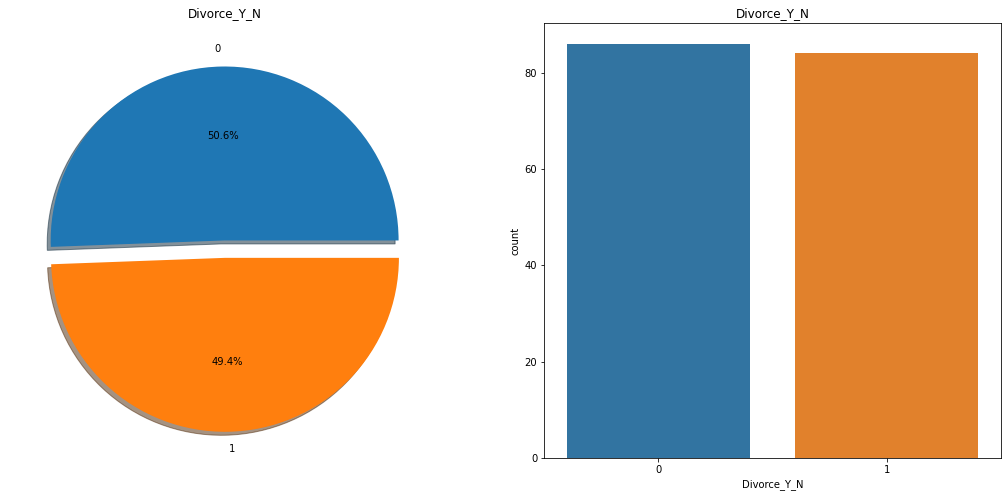

In [ ]:
#target variable analysis
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Divorce_Y_N'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Divorce_Y_N',fontsize = 20)
ax[0].set_ylabel('')
sns.countplot('Divorce_Y_N',data=df,ax=ax[1])
ax[1].set_title('Divorce_Y_N')
plt.show()

## Model Building

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

### SVC

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.957 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.522 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

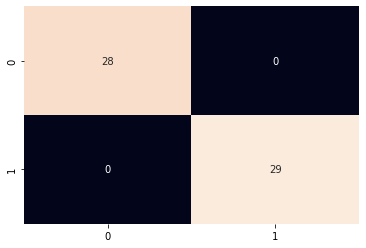

In [ ]:
SVC1=SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(SVC1, param_grid, refit = True, verbose = 3,cv=5)

## fitting train data
SVC1clf = grid.fit(x_train, y_train)

## making predictions
y_pred=SVC1clf.predict(x_test)

#making heatmap for confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,cbar=False, fmt='g')

In [ ]:
print(grid.best_params_)

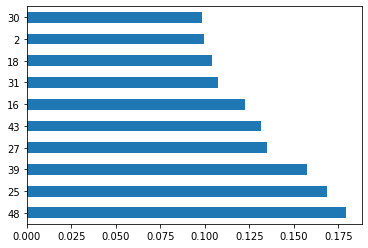

In [ ]:
## Finding features that determine dependent variable the most

SVC1=SVC(C= 0.1, gamma=1, kernel= 'linear')
SVC1clf = SVC1.fit(x_train, y_train)

pd.Series(abs(SVC1.coef_[0])).nlargest(10).plot(kind='barh')

#### Using only top 10 features for making model for better accuracy

In [ ]:
top_ten = df.iloc[:, [2,16,18,25,27,30,31,39,43,48]]
top_ten

,begin_correct,happy,roles,anxieties,hopes_wishes,Aggro_argue,Always_never,idk_what's_going_on,good_to_leave_home,accusations
0,4,0,0,0,0,1,2,3,2,3
1,4,4,3,1,0,0,4,4,4,4
2,2,3,3,2,2,3,3,3,3,1
3,3,3,3,1,1,2,3,4,2,3
4,1,1,2,2,2,1,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,4,4,0,0,1
166,0,0,0,0,0,0,1,1,1,2
167,0,0,0,1,0,1,1,2,0,0
168,0,0,0,0,0,0,0,1,0,2


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



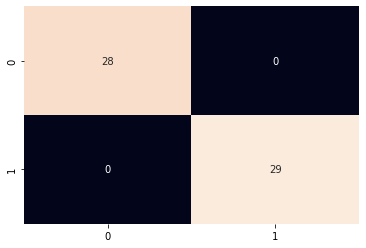

In [ ]:
new_SVC = SVC(C= 0.1, gamma=1, kernel= 'linear')
new_clf = SVC1.fit(x_train, y_train)

## making predictions
y_pred=new_clf.predict(x_test)

# making heatmap for confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,cbar=False, fmt='g')

## Classification report
print(classification_report(y_test,y_pred))

### Logistic Regression

In [ ]:
# Implementing GridSearchCV to get best parameters

logistic_regression = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, n_jobs=-1, scoring='f1_macro',error_score=0)
grid_result = grid_search.fit(x,y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.976140 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



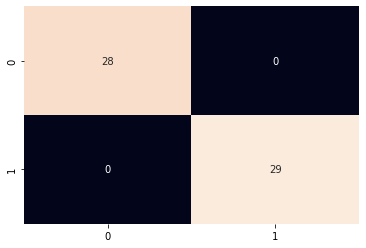

In [ ]:
## Making model and fitting data
logistic_regression = LogisticRegression(solver='newton-cg',C=100,penalty='l2')
logistic_regression=logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

print(classification_report(y_test,y_pred))

# making heatmap for confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,cbar=False, fmt='g')

In [ ]:
print(logistic_regression.coef_)

[[ 4.69629933e-01  5.17752645e-01  7.38656553e-01  3.24597250e-01
   3.27088159e-01  5.57024895e-01  8.14714588e-05 -3.16156469e-03
  -4.24411991e-04 -3.38977801e-01  6.10720247e-02  4.16776174e-01
  -1.15267411e-01  3.46727489e-01  6.07845296e-01  3.56564246e-01
   7.74772507e-01  4.32934924e-01  6.49919520e-01  6.58854972e-01
   2.15104549e-01 -1.57452999e-02 -9.07459372e-02 -2.39084355e-01
   2.28993424e-01  1.10234717e+00  2.19914482e-01  7.99979714e-01
   3.39580530e-01  4.15635686e-01  7.20518150e-01  5.53434924e-01
   4.28709824e-01  4.80527879e-01  2.42538687e-01  5.34197852e-01
   2.41806334e-03  4.67785700e-01  6.30948646e-01  1.13080675e+00
   4.18906289e-01  3.25203023e-01  2.82966730e-01  7.73273365e-01
   6.29374949e-03 -4.44302594e-02  2.41893145e-01 -1.22744776e-01
   1.04351929e+00  3.56940093e-01 -1.24430931e-01  4.53446689e-01
   5.24199870e-01 -3.72255724e-01]]


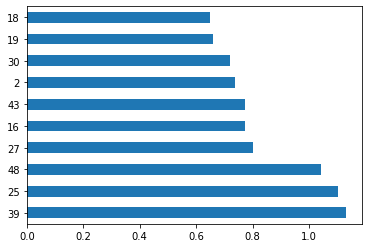

In [ ]:
## Getting top 10 most immportant features, I will add column names afterwards
pd.Series(abs(logistic_regression.coef_[0])).nlargest(10).plot(kind='barh')

#### Using only top 10 features for making model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



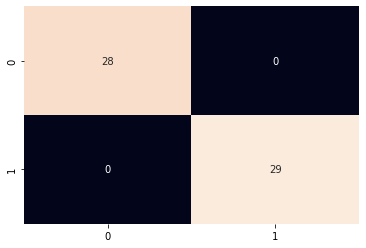

In [ ]:
LR = LogisticRegression(solver='newton-cg',C=100,penalty='l2')
new_lr_model = LR.fit(x_train,y_train)
y_pred=new_lr_model.predict(x_test)

print(classification_report(y_test,y_pred))\

#making heatmap for confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,cbar=False, fmt='g')

### Random Forest

In [ ]:
# Confusion Matrix function 

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'): 
  """Plots a confusion matrix.""" 
  if classes is not None: 
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50}) 
  else: 
    sns.heatmap(cm, vmin=0., vmax=1.) 
  plt.title(title) 
  plt.ylabel('True label') 
  plt.xlabel('Predicted label')

Training Accuracy is:  1.0
Testing Accuracy is:  0.9824561403508771


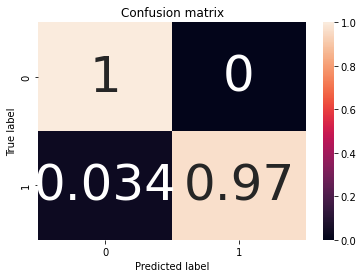

In [ ]:
random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy') 
random_forest.fit(x_train, y_train)
prediction_test = random_forest.predict(X=x_test) 

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(x_train, y_train)) 

# Accuracy on Train 
print("Testing Accuracy is: ", random_forest.score(x_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test) 
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis] 
plt.figure()
plot_confusion_matrix(cm_norm, classes=random_forest.classes_)

### Naive Bayes

In [ ]:
# Define function

def describe_model(estimator, X, y):
  print(f"Cross-validation accuracy: {cross_val_score(estimator, X, y, scoring = 'accuracy').mean():.3f}")
  
  selector_forward = SequentialFeatureSelector(estimator, n_features_to_select = 5, direction = "forward")
  selector_forward.fit(X, y)
  X_FW = selector_forward.transform(X)
  print(f"Accuracy with forward selection of 5 features: {cross_val_score(estimator, X_FW, y, scoring = 'accuracy').mean():.3f}")
  
  selector_backward = SequentialFeatureSelector(estimator, n_features_to_select = 5, direction = "backward")
  selector_backward.fit(X, y)
  X_BW = selector_backward.transform(X)
  print(f"Accuracy with backward selection of 5 features: {cross_val_score(estimator, X_BW, y, scoring = 'accuracy').mean():.3f}")

In [ ]:
label_corr = dict()
for i in list(df.columns):
    if pearsonr(df['Divorce_Y_N'],df[i])[0] >= 0.7 or pearsonr(df['Divorce_Y_N'],df[i])[0] <= -0.2:
        label_corr[i] = pearsonr(df['Divorce_Y_N'],df[i])[0]

label_corr_df = pd.DataFrame()
label_corr_df['Variable'] = label_corr.keys()
label_corr_df['Correlation'] = label_corr.values()
label_corr_df = label_corr_df[label_corr_df.Variable!='Divorce_Y_N']
label_corr_df = label_corr_df.sort_values(by='Correlation',ascending=False)
label_corr_df

,Variable,Correlation
37,idk_what's_going_on,0.938684
14,happy,0.929346
16,roles,0.928627
15,marriage,0.923208
8,harmony,0.918386
6,enjoy_travel,0.912368
17,trust,0.907008
12,dreams,0.901220
36,sudden_discussion,0.896180
38,calm_breaks,0.894356


In [ ]:
# Using Naives Bayes as our baseline model
naive_bayes = MultinomialNB()
describe_model(naive_bayes, x_train, y_train)

Cross-validation accuracy: 0.974
Accuracy with forward selection of 5 features: 0.965
Accuracy with backward selection of 5 features: 0.956


In [ ]:
print(f"Naives Bayes cross-validation accuracy: {cross_val_score(MNB, x_train, y_train, scoring= 'accuracy').mean():.3f}")
naive_bayes.fit(x_train, y_train)

In [ ]:
y_pred = naive_bayes.predict(x_test)
skor = accuracy_score(y_test, y_pred)
print('Accuracy_score is:', skor)
print("Classification report")
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cbar=False, fmt='g')
print(classification_report(y_test, y_pred))

## Model Voting System

In [ ]:
def vote(models, data):
  '''
      This function is to implement a voting system between a set of models
      where each model given a set of data predicts the outcome and then a
      voting between these outcome takes place so the highest vote becomes the 
      predicted value

      :argumenrs:
        models - a list containing all the trained models object
        data - a pandas dataframe containing the set of features needed for 
                prediction.

      :returns:
        voting result- an array of the final results of voting between the 
        models
  '''

  # prediction is an array of the format [{1:3, 0:1}, {1:2, 0:2}, {1:0, 0:4}]
  predictions = []
  for i in range(len(data)):
    predictions += [{1:0, 0:0}]
  
  for model in models:
    prediction = model.predict(X=data)
    for index,value in enumerate(prediction):
      predictions[index][value] += 1
  
  voting_result = []
  for ele in predictions:
    if ele[1] > ele[0]:
      voting_result += [1]
    elif ele[0] > ele[1]:
      voting_result += [0]
    else:
      print('Here')
      voting_result += [1]

  skor = accuracy_score(y_test, voting_result)
  cnf_matrix = confusion_matrix(y_test, voting_result)
  print(f'The accuracy of this system is {skor*100}%')
  plot_confusion_matrix(cnf_matrix)

  return voting_result

In [ ]:
print(vote([SVC1, logistic_regression, random_forest, naive_bayes], x_test))